In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D

%matplotlib inline

Using TensorFlow backend.


In [2]:
train_set = pd.read_csv("E:/markov ml/fashionmnist/fashion-mnist_train.csv")
test_set = pd.read_csv("E:/markov ml/fashionmnist/fashion-mnist_test.csv")

In [3]:
from sklearn.model_selection import train_test_split

X = np.array(train_set.iloc[:, 1:])
y = to_categorical(np.array(train_set.iloc[:, 0]))

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

print( x_train.shape,  y_train.shape, x_val.shape, y_val.shape)

(48000, 784) (48000, 10) (12000, 784) (12000, 10)


In [4]:
x_test = np.array(test_set.iloc[:, 1:])
y_test = to_categorical(np.array(test_set.iloc[:, 0]))

print(x_test.shape, y_test.shape)

(10000, 784) (10000, 10)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


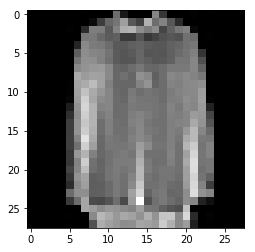

In [5]:
plt.imshow(x_test[7].reshape(28,28), cmap='gray', interpolation='none')
print(y_test[7])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


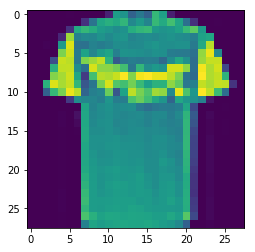

In [6]:
plt.imshow(x_test[3096].reshape(28,28), cmap='viridis', interpolation='none')
print(y_test[3096])

In [7]:
input_num_units = 784
hidden_num_units = 50
output_num_units = 10


batch_size = 256

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_val /= 255.0
x_train /= 255.0
x_test /= 255.0

In [9]:
#Deep learning model

model = Sequential()

model.add(Dense(input_dim = 784, output_dim = 500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, output_dim = 500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, output_dim = 500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, output_dim = 500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, output_dim = 500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, output_dim = 500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, output_dim = 500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, output_dim = 500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 500, output_dim = 250, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 250 , output_dim = 250, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 250, output_dim = 250, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(input_dim = 250, output_dim = 100, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(input_dim = 100, output_dim = 10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 25, batch_size = 256, validation_data=(x_val, y_val))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=500)`
  """
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
  import sys
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
  if __name__ == '__main__':
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", unit

Instructions for updating:
Use tf.cast instead.


C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=250, activation="relu", units=250)`
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=250, activation="relu", units=250)`
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=250, activation="relu", units=100)`
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=100, activation="softmax", units=10)`


Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 16s 324us/step - loss: 1.3599 - acc: 0.4274 - val_loss: 0.6966 - val_acc: 0.6963
Epoch 2/25
48000/48000 [==============================] - 14s 301us/step - loss: 0.6975 - acc: 0.7144 - val_loss: 0.6054 - val_acc: 0.7369
Epoch 3/25
48000/48000 [==============================] - 14s 296us/step - loss: 0.6292 - acc: 0.7397 - val_loss: 0.5692 - val_acc: 0.7681
Epoch 4/25
48000/48000 [==============================] - 15s 317us/step - loss: 0.5776 - acc: 0.7652 - val_loss: 0.5287 - val_acc: 0.7957
Epoch 5/25
48000/48000 [==============================] - 15s 306us/step - loss: 0.5387 - acc: 0.7966 - val_loss: 0.4560 - val_acc: 0.8341
Epoch 6/25
48000/48000 [==============================] - 15s 311us/step - loss: 0.5012 - acc: 0.8241 - val_loss: 0.4443 - val_acc: 0.8335
Epoch 7/25
48000/48000 [==============================] - 15s 320us/step - loss: 0.4826 - acc: 0.8330 - val_loss: 0.

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [40]:
# CNN

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

print(x_train.shape, x_test.shape, x_val.shape)

(48000, 28, 28, 1) (10000, 28, 28, 1) (12000, 28, 28, 1)


In [44]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape = (28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 25, batch_size = 256, validation_data=(x_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 41s 861us/step - loss: 0.8375 - acc: 0.6889 - val_loss: 0.5045 - val_acc: 0.8173
Epoch 2/25
48000/48000 [==============================] - 41s 855us/step - loss: 0.5110 - acc: 0.8084 - val_loss: 0.4143 - val_acc: 0.8551
Epoch 3/25
48000/48000 [==============================] - 41s 855us/step - loss: 0.4399 - acc: 0.8394 - val_loss: 0.3691 - val_acc: 0.8665
Epoch 4/25
48000/48000 [==============================] - 41s 856us/step - loss: 0.3993 - acc: 0.8532 - val_loss: 0.3364 - val_acc: 0.8808
Epoch 5/25
48000/48000 [==============================] - 41s 850us/step - loss: 0.3685 - acc: 0.8659 - val_loss: 0.3092 - val_acc: 0.8868
Epoch 6/25
48000/48000 [==============================] - 41s 847us/step - loss: 0.3493 - acc: 0.8717 - val_loss: 0.2914 - val_acc: 0.8952
Epoch 7/25
48000/48000 [==============================] - 41s 847us/step - loss: 0.3321 - acc: 0.8794 - val_loss: 0.